# **Exploratory Data Analysis** 

This is a well-known data set containing iris species and sepal and petal measurements

In [1]:
import os
import pandas as pd
import numpy as np

Load the data

In [2]:
filepath="../input/data-for-datavis/iris.csv"
data=pd.read_csv(filepath)
data.head()

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


1. The number of rows in data set
2. The names of columns in the dataset in a list form
3. Data types for each column.

In [3]:
print(data.shape[0])
print(data.columns.tolist())
print(data.dtypes)

150
['Id', 'Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)', 'Species']
Id                     int64
Sepal Length (cm)    float64
Sepal Width (cm)     float64
Petal Length (cm)    float64
Petal Width (cm)     float64
Species               object
dtype: object


Remove 'Iris-' portion of the name so that the species name is shorter

In [4]:
data['Species']=data.Species.str.replace('Iris-','')
data.head()

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


1. To count the number of species present
2. The mean, median, quantiles, ranges for each petal and sepal measurement

In [5]:
print(data.Species.value_counts())

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64


In [6]:
stats_df=data.describe()
stats_df.loc['range']=stats_df.loc['max']-stats_df.loc['min']

outfields=['mean','25%','50%','75%','range']
stats_df=stats_df.loc[outfields]
stats_df.rename({'50%':'median'}, inplace=True)
stats_df

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
mean,75.50,5.843333,3.054,3.758667,1.198667
25%,38.25,5.100000,2.800,1.600000,0.300000
median,75.50,5.800000,3.000,4.350000,1.300000
75%,112.75,6.400000,3.300,5.100000,1.800000
range,149.00,3.600000,2.400,5.900000,2.400000


1. The mean of each measurement(sepal_length, sepal_width, petal_length, petal_width)
2. The median of each of these measurements

In [7]:
data.groupby('Species').agg([np.mean, np.median])

Id        Sepal Length (cm)        Sepal Width (cm)         \
             mean median              mean median             mean median   
Species                                                                     
setosa       25.5   25.5             5.006    5.0            3.418    3.4   
versicolor   75.5   75.5             5.936    5.9            2.770    2.8   
virginica   125.5  125.5             6.588    6.5            2.974    3.0   

           Petal Length (cm)        Petal Width (cm)         
                        mean median             mean median  
Species                                                      
setosa                 1.464   1.50            0.244    0.2  
versicolor             4.260   4.35            1.326    1.3  
virginica              5.552   5.55            2.026    2.0

Make a scatter-plot of sepal_length vs sepal_width using Matplotlib

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

[Text(0.5, 0, 'Sepal Length (cm)'),
 Text(0, 0.5, 'Sepal Width (cm)'),
 Text(0.5, 1.0, 'Sepal Length Vs Sepal Width')]

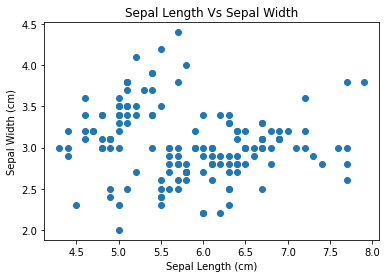

In [9]:
ax=plt.axes()
ax.scatter(data['Sepal Length (cm)'], data['Sepal Width (cm)'])
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length Vs Sepal Width')


Make a histogram of any one of the four features

[Text(0.5, 0, 'Petal Length (cm)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Petal Length')]

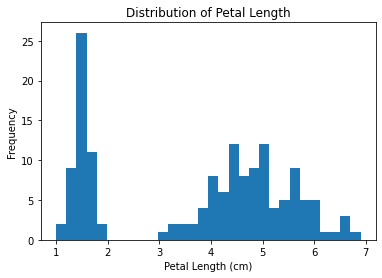

In [10]:
ax=plt.axes()
ax.hist(data['Petal Length (cm)'], bins=30)
ax.set(xlabel='Petal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Length')

Now plot a single plot with histogram for each feature

In [11]:
import seaborn as sns
sns.set_context('notebook')

Text(0.5, 0, 'Size (cm)')

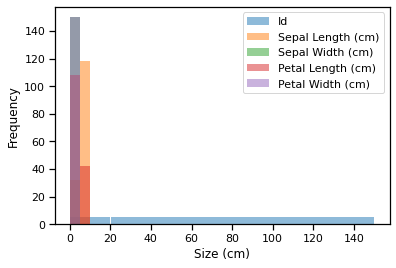

In [12]:
ax=data.plot.hist(bins=30, alpha=0.5)
ax.set_xlabel('Size (cm)')

Seperate plots in single figure

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  


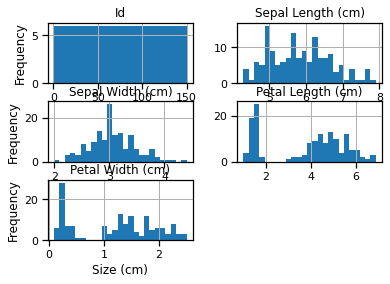

In [13]:
axlist=data.hist(bins=25)

for ax in axlist.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

Boxplot

array([[<AxesSubplot:title={'center':'Id'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'Petal Length (cm)'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'Petal Width (cm)'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'Sepal Length (cm)'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'Sepal Width (cm)'}, xlabel='[Species]'>,
        <AxesSubplot:>]], dtype=object)

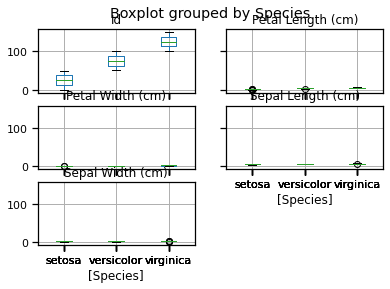

In [14]:
data.boxplot(by='Species')

Single Boxplot where the features are seperated in the x-axis and species are coloured with different hues.

In [15]:
plot_data=(data
         .set_index('Species')
         .stack()
         .to_frame()
         .reset_index()
         .rename(columns={0:'size', 'level_1':'measurement'})
         )

plot_data.head()

,Species,measurement,size
0,setosa,Id,1.0
1,setosa,Sepal Length (cm),5.1
2,setosa,Sepal Width (cm),3.5
3,setosa,Petal Length (cm),1.4
4,setosa,Petal Width (cm),0.2


  Make a pairplot 

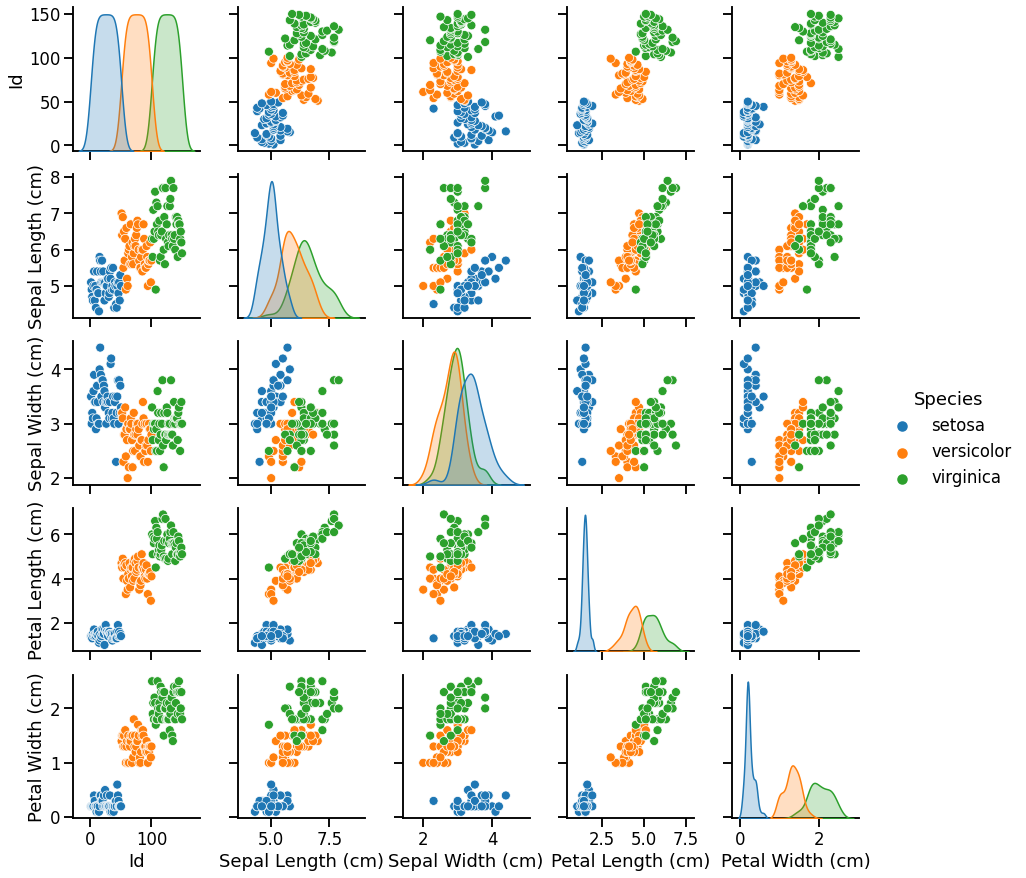

In [16]:
sns.set_context('talk')
sns.pairplot(data, hue='Species')